### Statistical Analysis: Am I able to compete in powerlifting?

Throughout my time at the gym over the last 13 years, I have usually gravitated to powerlifting and strength-style training, practicing the three main lifts above all: Bench Press, Squat and Deadlift. I have only competed once for fun because my local gym held a competition. There were no crazy lifts or elite participants and I did OK, but in the grand scope of the collective pool of powerlifters who aren't elite or professional, how do I compare now that I'm at a lifetime strength peak?

I will be analysing a dataset of over 400,000 lifters from the most highly rated powerlifting dataset on Kaggle to see where I compare now, at the end of 2024, and if I hit my lifetime achievements of a 260KG squat, 275KG deadlift and a 180KG bench press.   

Also, I'll be analysing the standard deviation of the best of each lift per athlete per competition from a filtered dataset of mostly non-professional athletes to see if I am within the first standard deviation for each lift, either now or in the future.

My lifts will be analysed for their percentile ranking in each of the three distributions, and I will calculate the probability of seeing my lifts occur in competition.   

I will also perform two sets of hypothesis tests using Z tests to see if my lifts for the three main lifts now, at the end of 2024 and my lifetime targets are statistically likely to exist in the distributions for both non-professional powerlifters and all lifters combined.   

Finally, I want to see whether there is a trend of lift distributions increasing over time to see whether this analysis might hold up in the next few years.

All of this is to answer the sinple question: could this lifetime casual legitimately compete in powerlifting?



### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Data Load
CSVs split into 13 dataframe CSVs so they can upload to GitHub.
Read into memory and combined back together.

#### Errors
Some names in the dataset were made from foreign charactersets which were interpreted in the CSVs as containing commas which interfered with the CSV delimiter, and as such were skipped with error_bad_lines=False

In [2]:
# Load all dataframe fragments
df_01 = pd.read_csv('https://raw.githubusercontent.com/thecyberdragon/data-analysis/main/powerlifting/df_01.csv?raw=true', error_bad_lines=False)
df_02 = pd.read_csv("https://raw.githubusercontent.com/thecyberdragon/data-analysis/main/powerlifting/df_02.csv?raw=true", error_bad_lines=False)
df_03 = pd.read_csv("https://raw.githubusercontent.com/thecyberdragon/data-analysis/main/powerlifting/df_03.csv?raw=true", error_bad_lines=False)
df_04 = pd.read_csv("https://raw.githubusercontent.com/thecyberdragon/data-analysis/main/powerlifting/df_04.csv?raw=true", error_bad_lines=False)
df_05 = pd.read_csv("https://raw.githubusercontent.com/thecyberdragon/data-analysis/main/powerlifting/df_05.csv?raw=true", error_bad_lines=False)
df_06 = pd.read_csv("https://raw.githubusercontent.com/thecyberdragon/data-analysis/main/powerlifting/df_06.csv?raw=true", error_bad_lines=False)
df_07 = pd.read_csv("https://raw.githubusercontent.com/thecyberdragon/data-analysis/main/powerlifting/df_07.csv?raw=true", error_bad_lines=False)
df_08 = pd.read_csv("https://raw.githubusercontent.com/thecyberdragon/data-analysis/main/powerlifting/df_08.csv?raw=true", error_bad_lines=False)
df_09 = pd.read_csv("https://raw.githubusercontent.com/thecyberdragon/data-analysis/main/powerlifting/df_09.csv?raw=true", error_bad_lines=False)
df_10 = pd.read_csv("https://raw.githubusercontent.com/thecyberdragon/data-analysis/main/powerlifting/df_10.csv?raw=true", error_bad_lines=False)
df_11 = pd.read_csv("https://raw.githubusercontent.com/thecyberdragon/data-analysis/main/powerlifting/df_11.csv?raw=true", error_bad_lines=False)
df_12 = pd.read_csv("https://raw.githubusercontent.com/thecyberdragon/data-analysis/main/powerlifting/df_12.csv?raw=true", error_bad_lines=False)
df_13 = pd.read_csv("https://raw.githubusercontent.com/thecyberdragon/data-analysis/main/powerlifting/df_13.csv?raw=true", error_bad_lines=False)

# Combine dataframes back together
df = pd.concat([df_01, df_02, df_03, df_04, df_05, df_06, df_07, df_08, df_09, df_10, df_11, df_12, df_13])

<ipython-input-2-b89125579ea9>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_01 = pd.read_csv('https://raw.githubusercontent.com/thecyberdragon/data-analysis/main/powerlifting/df_01.csv?raw=true', error_bad_lines=False)
<ipython-input-2-b89125579ea9>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_02 = pd.read_csv("https://raw.githubusercontent.com/thecyberdragon/data-analysis/main/powerlifting/df_02.csv?raw=true", error_bad_lines=False)
<ipython-input-2-b89125579ea9>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_03 = pd.read_csv("https://raw.githubusercontent.com/thecyberdragon/data-analysis/main/powerlifting/df_03.csv?raw=true", error_bad_lines=False)
<ipython-input-2-b89125579ea9>:5: Fut

### Set Values
Setting values for my current and target lifts and my weight & age class

In [3]:
my_bench = 140
my_squat = 220
my_deadlift = 230

my_bench_goal = 160
my_squat_goal = 240
my_deadlift_goal = 250

my_bench_lifetime = 180
my_squat_lifetime = 260
my_deadlift_lifetime = 270

my_weight = "100"
my_age = "24-34"

### Data Inspection

**String (object) columns**   
AgeClass - converting to categorical may have utility   
Division - could be categorical, but too much variation    
WeightClassKg - could be categorical, but too much variation   
Date - ok as a string as in a pedictable SQL format  
The other object columns are all OK as such    

**Float columns**   
No float columns need converting to another data type.      

In [ ]:
# Show the columns in the dataset for reference
print(df.dtypes)

Unnamed: 0           int64
Name                object
Sex                 object
Event               object
Equipment           object
Age                float64
AgeClass            object
Division            object
BodyweightKg       float64
WeightClassKg       object
Squat1Kg           float64
Squat2Kg           float64
Squat3Kg           float64
Squat4Kg           float64
Best3SquatKg       float64
Bench1Kg           float64
Bench2Kg           float64
Bench3Kg           float64
Bench4Kg           float64
Best3BenchKg       float64
Deadlift1Kg        float64
Deadlift2Kg        float64
Deadlift3Kg        float64
Deadlift4Kg        float64
Best3DeadliftKg    float64
TotalKg            float64
Place               object
Wilks              float64
McCulloch          float64
Glossbrenner       float64
IPFPoints          float64
Tested              object
Country             object
Federation          object
Date                object
MeetCountry         object
MeetState           object
M

### Data Type Conversions   
AgeClass will be converted to a categorical type, as all values fit a standardised format.
WeightClassKg and Division could be categorical but due to the variation of the standards around weight classes and divisions and the size of the dataset, it's not feesable to convert this to a categorical column, so it remains as an object

For example, 67.1KG class occurs 34140 times, 67.3 occurs 5657 times and 67.5KG occurs 64697 times. It's not realistic to categorise all liftes by this 0.2KG weight difference, it's just due to variation across competitions.   

The benefit of this being categorical may or may not be used in the analysis but it's there in case it finds use.

In [ ]:
# Convert AgeClass to a categorical column
df.AgeClass = pd.Categorical(df['AgeClass'], ["5-12","13-15","16-17","18-19","20-23","24-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80-999"], ordered=True)

### Null Checks and data checks   
Name, Sex, Event, Equipment, Place, Federation, Date, MeetCountry and MeetName are always filled in, so these columns will be reliable sources of aggregation.

When a lifter attempts a lift and fails, it is logged as a minus. To make aggregation such as median and mean, quantiles and variance to be more accurate and not affected by this, I'll be replacing all numbers below 0 with NaN.

Given that part of the analysis is age-specific as well as sex-specific, any missing entrees for sex will be dropped. Any missing age groups will be generated from the age, but if age is also null then the row will be dropped.

In [4]:
# Replace all negative numbers with NaN

df[df.Squat1Kg < 0] = np.nan
df[df.Squat2Kg < 0] = np.nan
df[df.Squat3Kg < 0] = np.nan
df[df.Squat4Kg < 0] = np.nan
df[df.Best3SquatKg < 0] = np.nan

df[df.Bench1Kg < 0] = np.nan
df[df.Bench2Kg < 0] = np.nan
df[df.Bench3Kg < 0] = np.nan
df[df.Bench4Kg < 0] = np.nan
df[df.Best3BenchKg < 0] = np.nan

df[df.Deadlift1Kg < 0] = np.nan
df[df.Deadlift2Kg < 0] = np.nan
df[df.Deadlift3Kg < 0] = np.nan
df[df.Deadlift4Kg < 0] = np.nan
df[df.Best3DeadliftKg < 0] = np.nan

In [ ]:
# Null checks

print("null checks")
print("Dataset Size: " + str(len(df)))
print("Name: " + str(df.Name.isnull().sum()))
print("Sex: " + str(df.Sex.isnull().sum()))
print("Event: " + str(df.Event.isnull().sum()))
print("Equipment: " + str(df.Equipment.isnull().sum()))
print("Age: " + str(df.Age.isnull().sum()))
print("AgeClass: " + str(df.AgeClass.isnull().sum()))
print("Division: " + str(df.Division.isnull().sum()))
print("BodyweightKg: " + str(df.BodyweightKg.isnull().sum()))
print("WeightClassKg: " + str(df.WeightClassKg.isnull().sum()))
print("Squat1Kg: " + str(df.Squat1Kg.isnull().sum()))
print("Squat2Kg: " + str(df.Squat2Kg.isnull().sum()))
print("Squat3Kg: " + str(df.Squat3Kg.isnull().sum()))
print("Squat4Kg: " + str(df.Squat4Kg.isnull().sum()))
print("Best3SquatKg: " + str(df.Best3SquatKg.isnull().sum()))
print("Bench1Kg: " + str(df.Bench1Kg.isnull().sum()))
print("Bench2Kg: " + str(df.Bench2Kg.isnull().sum()))
print("Bench3Kg: " + str(df.Bench3Kg.isnull().sum()))
print("Bench4Kg: " + str(df.Bench4Kg.isnull().sum()))
print("Best3BenchKg: " + str(df.Best3BenchKg.isnull().sum()))
print("Deadlift1Kg: " + str(df.Deadlift1Kg.isnull().sum()))
print("Deadlift2Kg: " + str(df.Deadlift2Kg.isnull().sum()))
print("Deadlift3Kg: " + str(df.Deadlift3Kg.isnull().sum()))
print("Deadlift4Kg: " + str(df.Deadlift4Kg.isnull().sum()))
print("Best3DeadliftKg: " + str(df.Best3DeadliftKg.isnull().sum()))
print("TotalKg: " + str(df.TotalKg.isnull().sum()))
print("Place: " + str(df.Place.isnull().sum()))
print("Wilks: " + str(df.Wilks.isnull().sum()))
print("McCulloch: " + str(df.McCulloch.isnull().sum()))
print("Glossbrenner: " + str(df.Glossbrenner.isnull().sum()))
print("IPFPoints: " + str(df.IPFPoints.isnull().sum()))
print("Tested: " + str(df.Tested.isnull().sum()))
print("Country: " + str(df.Country.isnull().sum()))
print("Federation: " + str(df.Federation.isnull().sum()))
print("Date: " + str(df.Date.isnull().sum()))
print("MeetCountry: " + str(df.MeetCountry.isnull().sum()))
print("MeetState: " + str(df.MeetState.isnull().sum()))
print("MeetName: " + str(df.MeetName.isnull().sum()))

null checks
Dataset Size: 1323354
Name: 439427
Sex: 439427
Event: 439427
Equipment: 439427
Age: 950516
AgeClass: 925461
Division: 442179
BodyweightKg: 453755
WeightClassKg: 448994
Squat1Kg: 1282284
Squat2Kg: 1284179
Squat3Kg: 1285543
Squat4Kg: 1321749
Best3SquatKg: 667159
Bench1Kg: 1237443
Bench2Kg: 1240893
Bench3Kg: 1244986
Bench4Kg: 1318835
Best3BenchKg: 536918
Deadlift1Kg: 1268831
Deadlift2Kg: 1271386
Deadlift3Kg: 1274233
Deadlift4Kg: 1318106
Best3DeadliftKg: 629598
TotalKg: 504082
Place: 439427
Wilks: 512003
McCulloch: 512133
Glossbrenner: 512003
IPFPoints: 535054
Tested: 641026
Country: 1142776
Federation: 439427
Date: 439427
MeetCountry: 439427
MeetState: 640258
MeetName: 439427


In [5]:
# Drop nulls in Sex and check before & after
print("Sex Nulls: " + str(df.Sex.isnull().sum()))
df = df.dropna(subset=["Sex"])
print("Sex Nulls: " + str(df.Sex.isnull().sum()))

# Check for rows where age and age group are null
age_nulls = df[df.Age.isnull()]
print("Age Nulls: " + str(len(age_nulls)))
age_and_class_nulls = age_nulls.AgeClass.isnull()
print("Age and AgeClass Nulls: " + str(len(age_and_class_nulls)))
df = df.dropna(subset=["Age"])
print("Age Nulls: " + str(df.Age.isnull().sum()))

# Investigate missing age groups
missing_classes = df[df.AgeClass.isnull()].Age
print("AgeClass Nulls: " + str(len(missing_classes)))
print("Age Minimum: " + str(missing_classes.min()))
print("Age Maximum: " + str(missing_classes.max()))

# Drop missing age classes
print("AgeClass Nulls: " + str(df.AgeClass.isnull().sum()))
df = df.dropna(subset=["AgeClass"])
print("AgeClass Nulls: " + str(df.AgeClass.isnull().sum()))

Sex Nulls: 439427
Sex Nulls: 0
Age Nulls: 511089
Age and AgeClass Nulls: 511089
Age Nulls: 0
AgeClass Nulls: 145
Age Minimum: 0.0
Age Maximum: 4.0
AgeClass Nulls: 145
AgeClass Nulls: 0


There were 439427 missing sex records which have been dropped.   
There were also 511089 missing ages and all of them missed age classes and have been dropped. Given the original dataset size is just 400,000, it's likely somewhere in the dataframe concatenation or in the split CSVs, a large number of completely null rows were added.   

There are 145 records where ages are present but ageclass is missing. On inspection, the maximum age in this subset of records is an age of 4. This isn't correct and the minimum age is 0. These rows have been removed.

A few more important columns have missing entrees.   
BodyweightKg: 2933   
WeightClassKg: 1750   
Best3SquatKg: 132586   
Best3BenchKg: 42370   
Best3DeadliftKg: 97354   
TotalKg: 15409   

Even with some weights and weight classes being missing, this can be analysed as an open format where weight isn't specified giving a slightly larger dataset to work with. Even if not, they won't be included in the weight class-specific analysis anyway.      

In competition, not everyone will actually do all three lifts (squat, bench, deadlift), and on those occasions a total isn't appropriate as there is a fundamental lift or lifts missing. Additionally, it's also likely they some lifters simply failed all three lifts and as such, have no best lift.      

Failed lifts have been replaced with nulls so this might explain the frequency of missing values. Conventional datakeeping for powerlifting puts a lift as a negative number for a failed lift, but this would have interfered with statistical analysis so have been replaced with null.   

The records these missing values belong to will be kept, as the analysis involving these records will be subsets anyway.

### Data Exploration

I'll be filtering by any Division that specifies it's for amateurs or isn't a pro show. There are also speciality shows such as for military or police which occured in the dataset to be avoided.    

By filtering down to amateur or non-pro shows it should give a better representation of my lifts in a competition if I were to enter.   

MR-O also means Mr. Olympia which will see some of the most elite lifters, so this division was removed to lesser skew the data towards the elite larger lifts.   

Filtering by just lifts from the UK reduced the dataset too much and resulted in a very hard to read unhelpful distribution, so all countries will be included.

MeetName was filtered to prevent anything with "Champion", "World" and "National" in the name as to elimitate any state, regional or world championships. This was found by observing the frequency of the 4th lifts in the dataset which aren't very common, and seem to be only in championship meets by large.

Given the variety and size of the dataset it isn't likely all pro and elite shows have been removed and only mid-level and amateur shows remain, but I'm confident that enough have been filtered out to make the analysis mostly accurate.













In [6]:
# Popular divisions for people between 30 and 35
print("Amateur and Non-Pro Division value counts")
popular_devisions = df[(df.Age < 35) & (df.Age > 30) & ((df.Division.str.contains("Amateur") | (df.Division.str.contains("Pro") == False))) & (df.Division != "MR-O") & (df.MeetName.str.contains("Champion") == False) & (df.MeetName.str.contains("National") == False) & (df.MeetName.str.contains("World") == False)].reset_index()
popular_devision_counts = popular_devisions.Division.value_counts().reset_index()
print(popular_devision_counts.head(15))

# Check if any best lifts are missing
missing_squatbest = popular_devisions[popular_devisions.Best3SquatKg.isnull()]
print("\nMissing a best squat: " + str(len(missing_squatbest)))

missing_all_squats = missing_squatbest[(missing_squatbest.Squat1Kg.isnull()) & (missing_squatbest.Squat2Kg.isnull()) & (missing_squatbest.Squat3Kg.isnull()) & (missing_squatbest.Squat4Kg.isnull())]
print("Missing all squats: " + str(len(missing_all_squats)))

missing_benchbest = popular_devisions[popular_devisions.Best3BenchKg.isnull()]
print("\nMissing a best bench: " + str(len(missing_benchbest)))

missing_all_benches = missing_benchbest[(missing_benchbest.Bench1Kg.isnull()) & (missing_benchbest.Bench2Kg.isnull()) & (missing_benchbest.Bench3Kg.isnull()) & (missing_benchbest.Bench4Kg.isnull())]
print("Missing all benches: " + str(len(missing_all_benches)))

missing_bestdead = popular_devisions[popular_devisions.Best3DeadliftKg.isnull()]
print("\nMissing a best deadlift: " + str(len(missing_bestdead)))

missing_alldeads = missing_bestdead[(missing_bestdead.Deadlift1Kg.isnull()) & (missing_bestdead.Deadlift2Kg.isnull()) & (missing_bestdead.Deadlift3Kg.isnull()) & (missing_bestdead.Deadlift4Kg.isnull())]
print("Missing all deadlifts: " + str(len(missing_alldeads)))

squat_merge = missing_squatbest.merge(missing_all_squats, on=["Name", "Date"], how="left", indicator=True)
squat_outliars = squat_merge[squat_merge["_merge"] != "both"]

print("\nSquat outliar")
print("================================")
print(squat_outliars[["Name","Date","Best3SquatKg_x","Squat1Kg_x","Squat2Kg_x","Squat3Kg_x","Squat4Kg_x", "MeetName_x"]])
print("================================")

print("\n4th Lifts Investigation")
total_df_size = len(df)
total_fourth_squats = len(df[df.Squat4Kg > 0])
total_fourth_bench = len(df[df.Bench4Kg > 0])
total_fourth_deadlift = len(df[df.Deadlift4Kg > 0])
print("\nTotal Dataset: " + str(total_df_size))
print("Squat 4th Stats")
print("Count: " + str(total_fourth_squats))
print("Proportion: " + str(np.round((total_fourth_squats / total_df_size) * 100, 5)))
print("Bench 4th Stats")
print("Count: " + str(total_fourth_bench))
print("Proportion: " + str(np.round((total_fourth_bench / total_df_size) * 100, 5)))
print("Deadlift 4th Stats")
print("Count: " + str(total_fourth_deadlift))
print("Proportion: " + str(np.round((total_fourth_deadlift / total_df_size) * 100, 5)))
print("\nFourth Records")

all_fourths = df[(df.Bench4Kg > 0) | (df.Squat4Kg > 0) | (df.Deadlift4Kg > 0)]
fourth_counts = all_fourths.MeetName.value_counts().reset_index()
print(fourth_counts.head(15))


Amateur and Non-Pro Division value counts
                       index  Division
0                       Open     14807
1               Amateur Open       732
2                       FR-O       508
3                          O       379
4                       M-OR       133
5                        M-O       131
6                 Submasters       125
7                         MO       123
8   Amateur Submasters 33-39       120
9           Submasters 33-39       119
10                     Light        70
11                   Class 1        68
12                     Heavy        67
13                       F-O        65
14                      F-OR        62

Missing a best squat: 6177
Missing all squats: 6176

Missing a best bench: 1946
Missing all benches: 1945

Missing a best deadlift: 4471
Missing all deadlifts: 4470

Squat outliar
                  Name        Date  Best3SquatKg_x  Squat1Kg_x  Squat2Kg_x  \
5749  Isabel de Berrié  2018-07-29             NaN         NaN         NaN 

### Question 1

Am I within 1 standard deviation of the distributions for non professional athletes for now, the end of 2024 and my lifetime maxes?      

Yes, all of my lifts (surprisingly) are within 1 standard deviation of the mean distribution for non professional athletes in my age and weight range.  

My Current Bench: 140   
My 2024 Target: 160   
My lifetime goal: 180   
Standard Deviation Range: 131.38 -> 167.0 <- 202.62   

My Squat: 220   
My 2024 Squat: 240   
My lifetime goal: 260   
Standard Deviation Range: 186.07 -> 236.17 <- 286.27   

My Deadlift: 230   
My 2024 Deadlift: 250   
My lifetime goal: 275   
Standatd Deviation Range: 214.96 -> 252.89 <- 290.82

In [7]:
# Set the dataframe to use for the statistical analysis
male_df = popular_devisions[(popular_devisions.Sex == "M") & (popular_devisions.WeightClassKg == my_weight)]

# Establish a dataframe per lift excluding nulls
bench_maxes = male_df[male_df.Best3BenchKg > 0]
squat_maxes = male_df[male_df.Best3SquatKg > 0]
deadlift_maxes = male_df[male_df.Best3DeadliftKg > 0]

# Bench stats
bench_mean = np.round(np.mean(bench_maxes.Best3BenchKg),2)
bench_std = np.std(bench_maxes.Best3BenchKg)

print("Bench Statistics\n")
print("Minimum: " + str(bench_maxes.Best3BenchKg.min()))
print("Maximum: " + str(bench_maxes.Best3BenchKg.max()))
print("Mean: " + str(bench_mean))
print("Std: " + str(bench_std))
print("\nMy Current Bench: " + str(my_bench))
print("My 2024 Target: " + str(my_bench_goal))
print("My lifetime goal: " + str(my_bench_lifetime))
print("Standard Deviation Range: " + str(np.round(bench_mean-bench_std,2)) + " -> " + str(bench_mean) + " <- " + str(np.round(bench_mean+bench_std,2)))

# Squat stats
squat_mean = np.round(np.mean(squat_maxes.Best3SquatKg),2)
squat_std = np.std(squat_maxes.Best3SquatKg)

print("\nSquat Statistics\n")
print("Minimum: " + str(squat_maxes.Best3SquatKg.min()))
print("Maximum: " + str(squat_maxes.Best3SquatKg.max()))
print("Mean: " + str(squat_mean))
print("Std: " + str(squat_std))
print("\nMy Squat: " + str(my_squat))
print("My 2024 Squat: " + str(my_squat_goal))
print("My lifetime goal: " + str(my_squat_lifetime))
print("Standard Deviation Range: " + str(np.round(squat_mean - squat_std,2)) + " -> " + str(squat_mean) + " <- " + str(np.round(squat_mean + squat_std,2)))

# Deadlift stats
deadlift_mean = np.round(np.mean(deadlift_maxes.Best3DeadliftKg),2)
deadlift_std = np.std(deadlift_maxes.Best3DeadliftKg)

print("\nDeadlift Statistics\n")
print("Minimum: " + str(deadlift_maxes.Best3DeadliftKg.min()))
print("Maximum: " + str(deadlift_maxes.Best3DeadliftKg.max()))
print("Mean: " + str(deadlift_mean))
print("Std: " + str(deadlift_std))
print("\nMy Deadlift: " + str(my_deadlift))
print("My 2024 Deadlift: " + str(my_deadlift_goal))
print("My lifetime goal: " + str(my_deadlift_lifetime))
print("Standatd Deviation Range: " + str(np.round(deadlift_mean - deadlift_std, 2)) + " -> " + str(deadlift_mean) + " <- " + str(np.round(deadlift_mean + deadlift_std, 2)))

Bench Statistics

Minimum: 50.0
Maximum: 376.48
Mean: 167.0
Std: 35.62451268337186

My Current Bench: 140
My 2024 Target: 160
My lifetime goal: 180
Standard Deviation Range: 131.38 -> 167.0 <- 202.62

Squat Statistics

Minimum: 60.0
Maximum: 420.0
Mean: 236.17
Std: 50.09948042108683

My Squat: 220
My 2024 Squat: 240
My lifetime goal: 260
Standard Deviation Range: 186.07 -> 236.17 <- 286.27

Deadlift Statistics

Minimum: 62.5
Maximum: 390.0
Mean: 252.89
Std: 37.92959500386703

My Deadlift: 230
My 2024 Deadlift: 250
My lifetime goal: 270
Standatd Deviation Range: 214.96 -> 252.89 <- 290.82


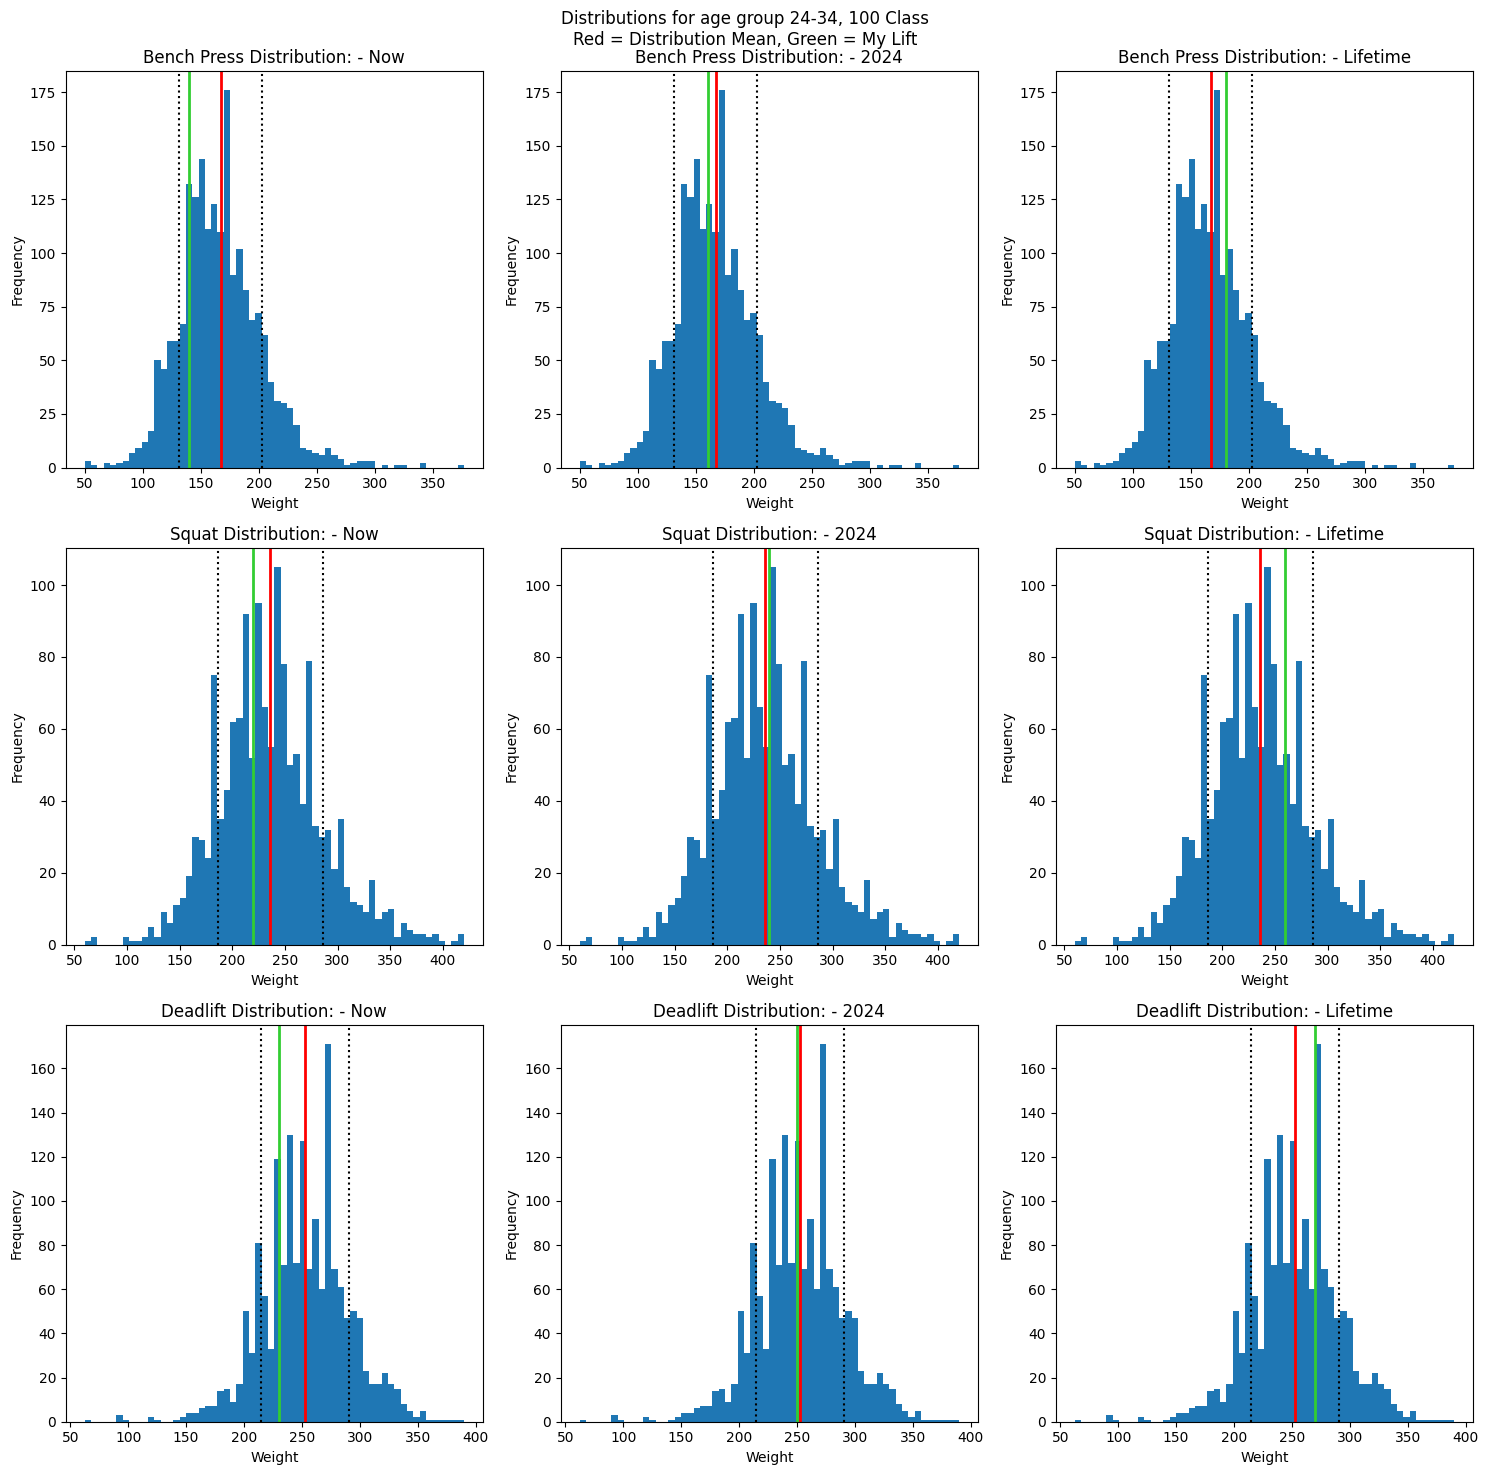

<Figure size 640x480 with 0 Axes>

In [72]:
# Visualising the standard deviation range per life for now, 2024 and lifetime

ax = plt.figure(figsize=(15,15))
ax.suptitle("Distributions for age group " + my_age + ", " + my_weight + " Class\nRed = Distribution Mean, Green = My Lift")

# Bench
plt.subplot(3,3,1)
plt.hist(male_df.Best3BenchKg, bins=60)
plt.axvline((bench_mean-bench_std), color="black", linestyle="dotted")
plt.axvline(bench_mean, color="red", linewidth=2)
plt.axvline((bench_mean+bench_std), color="black", linestyle="dotted")
plt.axvline(my_bench, color="limegreen", linewidth=2)
plt.title("Bench Press Distribution: - Now")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.subplot(3,3,2)
plt.hist(male_df.Best3BenchKg, bins=60)
plt.axvline((bench_mean-bench_std), color="black", linestyle="dotted")
plt.axvline(bench_mean, color="red", linewidth=2)
plt.axvline((bench_mean+bench_std), color="black", linestyle="dotted")
plt.axvline(my_bench_goal, color="limegreen", linewidth=2)
plt.title("Bench Press Distribution: - 2024")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.subplot(3,3,3)
plt.hist(male_df.Best3BenchKg, bins=60)
plt.axvline((bench_mean-bench_std), color="black", linestyle="dotted")
plt.axvline(bench_mean, color="red", linewidth=2)
plt.axvline((bench_mean+bench_std), color="black", linestyle="dotted")
plt.axvline(my_bench_lifetime, color="limegreen", linewidth=2)
plt.title("Bench Press Distribution: - Lifetime")
plt.xlabel("Weight")
plt.ylabel("Frequency")

# Squat
plt.subplot(3,3,4)
plt.hist(male_df.Best3SquatKg, bins=60)
plt.axvline((squat_mean - squat_std), color="black", linestyle="dotted")
plt.axvline(squat_mean, color="red", linewidth=2)
plt.axvline((squat_mean + squat_std), color="black", linestyle="dotted")
plt.axvline(my_squat, color="limegreen", linewidth=2)
plt.title("Squat Distribution: - Now")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.subplot(3,3,5)
plt.hist(male_df.Best3SquatKg, bins=60)
plt.axvline((squat_mean - squat_std), color="black", linestyle="dotted")
plt.axvline(squat_mean, color="red", linewidth=2)
plt.axvline((squat_mean + squat_std), color="black", linestyle="dotted")
plt.axvline(my_squat_goal, color="limegreen", linewidth=2)
plt.title("Squat Distribution: - 2024")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.subplot(3,3,6)
plt.hist(male_df.Best3SquatKg, bins=60)
plt.axvline((squat_mean - squat_std), color="black", linestyle="dotted")
plt.axvline(squat_mean, color="red", linewidth=2)
plt.axvline((squat_mean + squat_std), color="black", linestyle="dotted")
plt.axvline(my_squat_lifetime, color="limegreen", linewidth=2)
plt.title("Squat Distribution: - Lifetime")
plt.xlabel("Weight")
plt.ylabel("Frequency")

# Deadlift
plt.subplot(3,3,7)
plt.hist(male_df.Best3DeadliftKg, bins=60)
plt.axvline((deadlift_mean - deadlift_std), color="black",linestyle="dotted")
plt.axvline(deadlift_mean, color="red", linewidth=2)
plt.axvline((deadlift_mean + deadlift_std), color="black",linestyle="dotted")
plt.axvline(my_deadlift, color="limegreen", linewidth=2)
plt.title("Deadlift Distribution: - Now")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.subplot(3,3,8)
plt.hist(male_df.Best3DeadliftKg, bins=60)
plt.axvline((deadlift_mean - deadlift_std), color="black",linestyle="dotted")
plt.axvline(deadlift_mean, color="red", linewidth=2)
plt.axvline((deadlift_mean + deadlift_std), color="black",linestyle="dotted")
plt.axvline(my_deadlift_goal, color="limegreen", linewidth=2)
plt.title("Deadlift Distribution: - 2024")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.subplot(3,3,9)
plt.hist(male_df.Best3DeadliftKg, bins=60)
plt.axvline((deadlift_mean - deadlift_std), color="black",linestyle="dotted")
plt.axvline(deadlift_mean, color="red", linewidth=2)
plt.axvline((deadlift_mean + deadlift_std), color="black",linestyle="dotted")
plt.axvline(my_deadlift_lifetime, color="limegreen", linewidth=2)
plt.title("Deadlift Distribution: - Lifetime")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.tight_layout()

plt.show()
plt.clf()



### Question 2

How far am I from the mean, median and mode of all three lift distributions for non-professional athletes, currently?   

**Bench**: Mean(167), Median(165), Mode(150)   
My end of 2023 bench of 140KG is 27 below the mean, 25 below the median, and 10 below the mode.   
At the end of 2024, my bench should be 160KG, putting me 7KG below the mean, 5 below the median and exactly on the mode.   
Finally, my lifetime goal of 180KG is 13 above the mean, 15 above the media and 30 above the mode.   
   
   
**Squat**: Mean(236), Median(232), Mode(250)   
My end of 2023 squat is 220KG which is 16 below the mean, 12 below the median and 30 below the mode.   
My end of 2024 target of 240KG is 4 above the mean, 8 above the median and 10 below the mode.   
Finally, my lifetime goal of 260KG is 24 above the mean, 28 above the median and 10 above the mode.   

     
**Deadlift**: Mean(252), Median(250), Mode(250)   
My end of 2023 deadlift is 230KG which is 22 below the mean, 20 below the median and 20 below the mode.   
My end of 2024 target is 250KG which is 2 below the median, equal to both the median and mode.   
Finally, my lifetime goal of 275KG is 23KG above the mean and 27 above both median and mode.   

Surprisingly, all of my three lifts will either in a year or in a few years be at or above the general average according to this dataset.   

In [9]:
# Bench Statistics
bench_median = np.median(bench_maxes.Best3BenchKg)
bench_mode = stats.mode(bench_maxes.Best3BenchKg)

print("Bench Statistics")
print("Mean: " + str(bench_mean))
print("Median: " + str(bench_median))
print("Mode: " + str(bench_mode))
print("\nMy Current Bench: " + str(my_bench))
print("My 2024 Target: " + str(my_bench_goal))
print("My lifetime goal: " + str(my_bench_lifetime))

# Squat Statistics
squat_median = np.median(squat_maxes.Best3SquatKg)
squat_mode = stats.mode(squat_maxes.Best3SquatKg)

print("\nSquat Statistics")
print("Mean: " + str(squat_mean))
print("Median: " + str(squat_median))
print("Mode: " + str(squat_mode))
print("\nMy Squat: " + str(my_squat))
print("My 2024 Squat: " + str(my_squat_goal))
print("My lifetime goal: " + str(my_squat_lifetime))

# Deadlift Statistics
deadlift_median = np.median(deadlift_maxes.Best3DeadliftKg)
deadlift_mode = stats.mode(deadlift_maxes.Best3DeadliftKg)

print("\nDeadlift Statistics")
print("Mean: " + str(deadlift_mean))
print("Median: " + str(deadlift_median))
print("Mode: " + str(deadlift_mode))
print("\nMy Deadlift: " + str(my_deadlift))
print("My 2024 Deadlift: " + str(my_deadlift_goal))
print("My lifetime goal: " + str(my_deadlift_lifetime))

Bench Statistics
Mean: 167.0
Median: 165.0
Mode: ModeResult(mode=150.0, count=83)

My Current Bench: 140
My 2024 Target: 160
My lifetime goal: 180

Squat Statistics
Mean: 236.17
Median: 232.5
Mode: ModeResult(mode=250.0, count=63)

My Squat: 220
My 2024 Squat: 240
My lifetime goal: 260

Deadlift Statistics
Mean: 252.89
Median: 250.0
Mode: ModeResult(mode=250.0, count=94)

My Deadlift: 230
My 2024 Deadlift: 250
My lifetime goal: 270


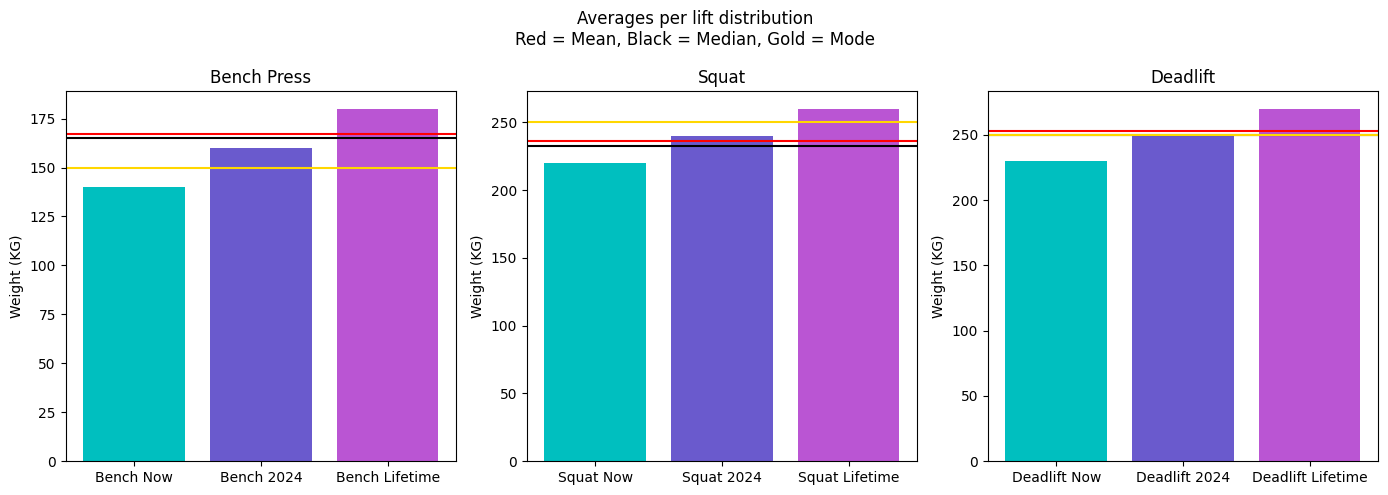

<Figure size 640x480 with 0 Axes>

In [65]:
# Bar chart vis for Q2

q2_bench_x = ["Bench Now","Bench 2024","Bench Lifetime"]
q2_bench_y = [my_bench, my_bench_goal, my_bench_lifetime]

q2_squat_x = ["Squat Now","Squat 2024","Squat Lifetime"]
q2_squat_y = [my_squat, my_squat_goal, my_squat_lifetime]

q2_deadlift_x = ["Deadlift Now","Deadlift 2024","Deadlift Lifetime"]
q2_deadlift_y = [my_deadlift, my_deadlift_goal, my_deadlift_lifetime]

q2_fig = plt.figure(figsize=(14,5))
q2_fig.suptitle("Averages per lift distribution\nRed = Mean, Black = Median, Gold = Mode")

# Bench
plt.subplot(1,3,1)
plt.title("Bench Press")
plt.ylabel("Weight (KG)")
plt.axhline(bench_mean, color="red")
plt.axhline(bench_median, color="black")
plt.axhline(float(str(bench_mode).split("=")[1].split(",")[0]), color="gold")
plt.bar(x=q2_bench_x, height=q2_bench_y, color=["c","slateblue","mediumorchid"])

# Squat
plt.subplot(1,3,2)
plt.title("Squat")
plt.ylabel("Weight (KG)")
plt.axhline(squat_mean, color="red")
plt.axhline(squat_median, color="black")
plt.axhline(float(str(squat_mode).split("=")[1].split(",")[0]), color="gold")
plt.bar(x=q2_squat_x, height=q2_squat_y, color=["c","slateblue","mediumorchid"])

# Deadlift
plt.subplot(1,3,3)
plt.title("Deadlift")
plt.ylabel("Weight (KG)")
plt.axhline(deadlift_mean, color="red")
plt.axhline(deadlift_median, color="black")
plt.axhline(float(str(deadlift_mode).split("=")[1].split(",")[0]), color="gold")
plt.bar(x=q2_deadlift_x, height=q2_deadlift_y, color=["c","slateblue","mediumorchid"])


plt.tight_layout()
plt.show()
plt.clf()

### Question 3

What percentile am I in for each of the three lifts: now, at the end of 2024, and my lifetime goals?   

My squat now: 0.4 percentile   
My squat ending 2024: 0.6 percentile   
My squat lifetime goal: 0.8 percentile   

My bench now: 0.3 percentile   
My bench ending 2024: 0.5 percentile   
My bench lifetime goal: 0.7 percentile  

My deadlift now: 0.3 perentile   
My deadlift ending 2024: 0.5 perentile   
My deadlift lifetime goal: 0.8 percentile  

In [11]:
# Percentiles
percentiles = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# Percentile Ranges
print("Squat Percentile Ranges")
print(squat_maxes.Best3SquatKg.quantile(percentiles))

print("\nBench Percentile Ranges")
print(bench_maxes.Best3BenchKg.quantile(percentiles))

print("\nDeadlift Percentile Ranges")
print(deadlift_maxes.Best3DeadliftKg.quantile(percentiles))


Squat Percentile Ranges
0.1    176.710
0.2    195.000
0.3    210.000
0.4    222.500
0.5    232.500
0.6    245.000
0.7    258.515
0.8    275.000
0.9    300.000
Name: Best3SquatKg, dtype: float64

Bench Percentile Ranges
0.1    125.00
0.2    140.00
0.3    147.50
0.4    155.00
0.5    165.00
0.6    172.50
0.7    182.50
0.8    192.78
0.9    210.00
Name: Best3BenchKg, dtype: float64

Deadlift Percentile Ranges
0.1    206.38
0.2    225.00
0.3    235.00
0.4    242.67
0.5    250.00
0.6    262.50
0.7    272.50
0.8    282.50
0.9    300.00
Name: Best3DeadliftKg, dtype: float64


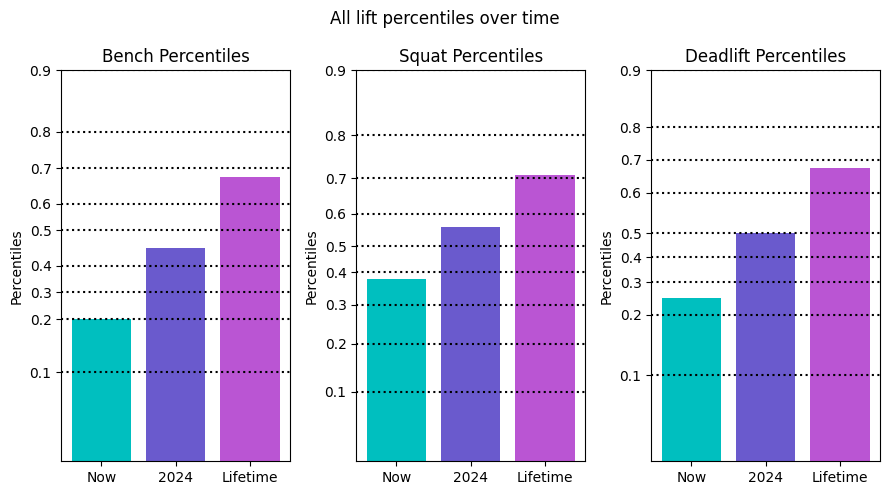

<Figure size 640x480 with 0 Axes>

In [43]:
# Show the percentile climb in a barchart or line chart

# Percentile frames
bench_percentiles = bench_maxes.Best3BenchKg.quantile(percentiles).reset_index()
squat_percentiles = squat_maxes.Best3SquatKg.quantile(percentiles).reset_index()
deadlift_percentiles = deadlift_maxes.Best3DeadliftKg.quantile(percentiles).reset_index()

q3_fig = plt.figure(figsize=(9,5))
q3_fig.suptitle("All lift percentiles over time")

# Bench
pax_1 = plt.subplot(1,3,1)
pax_1.set_ylim(100,210)
plt.bar(x= ["Now","2024","Lifetime"] , height=[my_bench, my_bench_goal, my_bench_lifetime], color=["c","slateblue","mediumorchid"])
pax_1.set_yticks(bench_percentiles["Best3BenchKg"])
pax_1.set_yticklabels(percentiles)
for value in bench_percentiles["Best3BenchKg"]:
  plt.axhline(value, color="black",linestyle="dotted")
plt.title("Bench Percentiles")
plt.ylabel("Percentiles")

# Squat
pax_2 = plt.subplot(1,3,2)
pax_2.set_ylim(150,300)
plt.bar(x= ["Now","2024","Lifetime"] , height=[my_squat, my_squat_goal, my_squat_lifetime], color=["c","slateblue","mediumorchid"])
pax_2.set_yticks(squat_percentiles["Best3SquatKg"])
pax_2.set_yticklabels(percentiles)
for value in squat_percentiles["Best3SquatKg"]:
  plt.axhline(value, color="black",linestyle="dotted")
plt.title("Squat Percentiles")
plt.ylabel("Percentiles")

# Deadlift
pax_3 = plt.subplot(1,3,3)
pax_3.set_ylim(180,300)
plt.bar(x=["Now","2024","Lifetime"], height=[my_deadlift, my_deadlift_goal, my_deadlift_lifetime], color=["c","slateblue","mediumorchid"])
pax_3.set_yticks(deadlift_percentiles["Best3DeadliftKg"])
pax_3.set_yticklabels(percentiles)
for value in deadlift_percentiles["Best3DeadliftKg"]:
  plt.axhline(value, color="black",linestyle="dotted")
plt.title("Deadlift Percentiles")
plt.ylabel("Percentiles")

plt.tight_layout()
plt.show()
plt.clf()

### Question 4

What is the probability that my lifts would be seen in the competitive distribution now, at the end of 2024, and my lifetime goals?  

Squat Probabilities   
Squat Now: 37.34%   
Squat 2024: 53.05%   
Squat Lifetime: 68.28%   

Bench Probabilities   
Bench Now: 22.43%   
Bench 2024: 42.21%   
Bench Lifetime: 64.24%   

Deadlift Probabilities   
Deadlift Now: 27.3%   
Deadlift 2024: 46.96%   
Deadlift Lifetime: 72.0%   

In [44]:
# Probabilities

squat_now_probability = np.round(stats.norm.cdf(my_squat, squat_mean, squat_std), 4) * 100
squat_2024_probability = np.round(stats.norm.cdf(my_squat_goal, squat_mean, squat_std), 4) * 100
squat_lifetime_probability = np.round(stats.norm.cdf(my_squat_lifetime, squat_mean, squat_std), 4) * 100

print("Squat Probabilities")
print("Squat Now: " + str(squat_now_probability) + "%")
print("Squat 2024: " + str(squat_2024_probability) + "%")
print("Squat Lifetime: " + str(squat_lifetime_probability) + "%")

bench_now_probability = np.round(stats.norm.cdf(my_bench, bench_mean, bench_std), 4) * 100
bench_2024_probability = np.round(stats.norm.cdf(my_bench_goal, bench_mean, bench_std), 4) * 100
bench_lifetime_probability = np.round(stats.norm.cdf(my_bench_lifetime, bench_mean, bench_std), 4) * 100

print("\nBench Probabilities")
print("Bench Now: " + str(bench_now_probability) + "%")
print("Bench 2024: " + str(bench_2024_probability) + "%")
print("Bench Lifetime: " + str(bench_lifetime_probability) + "%")

deadlift_now_probability = np.round(stats.norm.cdf(my_deadlift, deadlift_mean, deadlift_std), 3) * 100
deadlift_2024_probability = np.round(stats.norm.cdf(my_deadlift_goal, deadlift_mean, deadlift_std), 4) * 100
deadlift_lifetime_probability = np.round(stats.norm.cdf(my_deadlift_lifetime, deadlift_mean, deadlift_std), 4) * 100

print("\nDeadlift Probabilities")
print("Deadlift Now: " + str(deadlift_now_probability) + "%")
print("Deadlift 2024: " + str(deadlift_2024_probability) + "%")
print("Deadlift Lifetime: " + str(deadlift_lifetime_probability) + "%")


Squat Probabilities
Squat Now: 37.34%
Squat 2024: 53.05%
Squat Lifetime: 68.28%

Bench Probabilities
Bench Now: 22.43%
Bench 2024: 42.21%
Bench Lifetime: 64.24%

Deadlift Probabilities
Deadlift Now: 27.3%
Deadlift 2024: 46.96%
Deadlift Lifetime: 67.4%


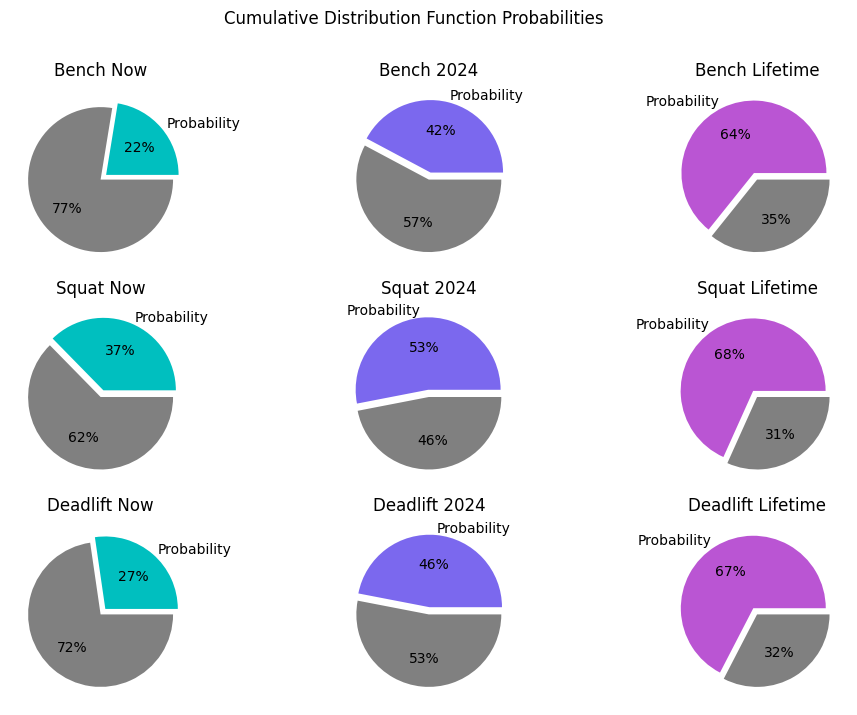

<Figure size 640x480 with 0 Axes>

In [81]:
# Pie charts of probabilities

q4_fig = plt.figure(figsize=(12,8))
q4_fig.suptitle("Cumulative Distribution Function Probabilities")

prob_labels = ["Probability", ""]

# Bench
plt.subplot(3,3,1)
plt.title("Bench Now", pad=10)
plt.pie([bench_now_probability/100, 1-(bench_now_probability/100)], labels = prob_labels, autopct = "%d%%", explode = (0.1,0), colors = ("c","gray"))

plt.subplot(3,3,2)
plt.title("Bench 2024", pad=10)
plt.pie([bench_2024_probability/100, 1-(bench_2024_probability/100)], labels = prob_labels, autopct = "%d%%", explode = (0.1,0), colors = ("mediumslateblue","gray"))

plt.subplot(3,3,3)
plt.title("Bench Lifetime", pad=10)
plt.pie([bench_lifetime_probability/100, 1-(bench_lifetime_probability/100)], labels = prob_labels, autopct = "%d%%", explode = (0.1,0), colors = ("mediumorchid","gray"))

# Squat
plt.subplot(3,3,4)
plt.title("Squat Now", pad=10)
plt.pie([squat_now_probability/100, 1-(squat_now_probability/100)], labels = prob_labels, autopct = "%d%%", explode = (0.1,0), colors = ("c","gray"))

plt.subplot(3,3,5)
plt.title("Squat 2024", pad=10)
plt.pie([squat_2024_probability/100, 1-(squat_2024_probability/100)], labels = prob_labels, autopct = "%d%%", explode = (0.1,0), colors = ("mediumslateblue","gray"))

plt.subplot(3,3,6)
plt.title("Squat Lifetime", pad=10)
plt.pie([squat_lifetime_probability/100, 1-(squat_lifetime_probability/100)], labels = prob_labels, autopct = "%d%%", explode = (0.1,0), colors = ("mediumorchid","gray"))

# Deadlift
plt.subplot(3,3,7)
plt.title("Deadlift Now", pad=10)
plt.pie([deadlift_now_probability/100, 1-(deadlift_now_probability/100)], labels = prob_labels, autopct = "%d%%", explode = (0.1,0), colors = ("c","gray"))

plt.subplot(3,3,8)
plt.title("Deadlift 2024", pad=10)
plt.pie([deadlift_2024_probability/100, 1-(deadlift_2024_probability/100)], labels = prob_labels, autopct = "%d%%", explode = (0.1,0), colors = ("mediumslateblue","gray"))

plt.subplot(3,3,9)
plt.title("Deadlift Lifetime", pad=10)
plt.pie([deadlift_lifetime_probability/100, 1-(deadlift_lifetime_probability/100)], labels = prob_labels, autopct = "%d%%", explode = (0.1,0), colors = ("mediumorchid","gray"))

plt.show()
plt.clf()

### Question 5

**hypothesis test**: Are my lifts statistically likely to exist in the non-professional and total lifters distributions?
   

Bench Z Scores (Only non-professionals)   
Now: 0.7505612952713092 - Statistically Likely!   
2024: 0.21692368754197447 - Statistically Likely!   
Lifetime: 0.31671392018736033 - Statistically Likely!   
   
      
Squat Z Scores   
Now: 0.017890331878870323 - Statistically Likely!   
2024: 0.01951672568604035 - Statistically Likely!   
Lifetime: 0.021143119493210384 - Statistically Likely!   
   

Deadlift Z Scores   
Now: 0.02358377020603395 - Statistically Likely!   
2024: 0.025634532832645596 - Statistically Likely!   
Lifetime: 0.028197986115910154 - Statistically Likely!   

   
Bench Z Scores (Division filters removed)   
Now: 0.7771400421128013 - Statistically Likely!   
2024: 0.3506991898277659 - Statistically Likely!   
Lifetime: 0.07574166245726947 - Statistically Likely!   
   
Squat Z Scores   
Now: 0.013784005829052669 - Statistically Likely!   
2024: 0.015037097268057456 - Statistically Likely!   
Lifetime: 0.016290188707062243 - Statistically Likely!   
   
Deadlift Z Scores   
Now: 0.018943130294001857 - Statistically Likely!   
2024: 0.020590359015219408 - Statistically Likely!   
Lifetime: 0.02264939491674135 - Statistically Likely!   

I verified these results using a cumulative distribution function test for each lift as it is now (lowest) against the dataset filtered by division, and one without that filter to allow pro and elite competitions to influence the mean and standard deviation.   

Cumulative distribution function test   
Bench (non pro) - Statistically Likely!   
Squat (non pro) - Statistically Likely!   
Deadlift (non pro) - Statistically Likely!   
Bench (all) - Statistically Likely!   
Squat (all) - Statistically Likely!   
Deadlift (all) - Statistically Likely!  

In [46]:
# Hypothesis Test
z_threshhold = stats.norm.ppf(1 - 0.05/2)
print("Significance Threshhold: " + str(z_threshhold))

bench_now_z = abs((my_bench-bench_mean) / bench_std)
bench_2024_z = abs((my_bench_goal-bench_mean) / bench_std)
bench_lifetime_z = abs((my_bench_lifetime-bench_mean)/bench_std)

squat_now_z = abs((my_squat / squat_mean) / squat_std)
squat_2024_z = abs((my_squat_goal / squat_mean) / squat_std)
squat_lifetime_z = abs((my_squat_lifetime / squat_mean) / squat_std)

deadlift_now_z = abs((my_deadlift / deadlift_mean) / deadlift_std)
deadlift_2024_z = abs((my_deadlift_goal / deadlift_mean) / deadlift_std)
deadlift_lifetime_z = abs((my_deadlift_lifetime / deadlift_mean) / deadlift_std)

def z_test_outcome(z, z_score):
  if z > z_score: return "Statistically Likely!"
  else: return "Statistically Unlikely"

print("\nBench Z Scores (Only non-professionals)")
print("Now: " + str(bench_now_z) + " - " + z_test_outcome(z_threshhold, bench_now_z))
print("2024: " + str(bench_2024_z) + " - " + z_test_outcome(z_threshhold, bench_2024_z))
print("Lifetime: " + str(bench_lifetime_z) + " - " + z_test_outcome(z_threshhold, bench_lifetime_z))
print("\nSquat Z Scores")
print("Now: " + str(squat_now_z) + " - " + z_test_outcome(z_threshhold, squat_now_z))
print("2024: " + str(squat_2024_z) + " - " + z_test_outcome(z_threshhold, squat_2024_z))
print("Lifetime: " + str(squat_lifetime_z) + " - " + z_test_outcome(z_threshhold, squat_lifetime_z))
print("\nDeadlift Z Scores")
print("Now: " + str(deadlift_now_z) + " - " + z_test_outcome(z_threshhold, deadlift_now_z))
print("2024: " + str(deadlift_2024_z) + " - " + z_test_outcome(z_threshhold, deadlift_2024_z))
print("Lifetime: " + str(deadlift_lifetime_z) + " - " + z_test_outcome(z_threshhold, deadlift_lifetime_z))

print("\nEliminating the division filters to show all lifters, both elite and amateur")

# Create new dataframe with all lifters in it for a wider test
male_df_all_divisions = df[(df.Age < 35) & (df.Age > 30) & (df.Sex == "M") & (df.WeightClassKg == my_weight)].reset_index()

# Calculate the wider  dataset means and standard deviations
all_squat_mean = male_df_all_divisions.Best3SquatKg.mean()
all_squat_std = np.std(male_df_all_divisions.Best3SquatKg)

all_bench_mean = male_df_all_divisions.Best3BenchKg.mean()
all_bench_std = np.std(male_df_all_divisions.Best3BenchKg)

all_deadlift_mean = male_df_all_divisions.Best3DeadliftKg.mean()
all_deadlift_std = np.std(male_df_all_divisions.Best3DeadliftKg)

# Conduct another round of Z tests
bench_now_z2 = abs((my_bench-all_bench_mean) / all_bench_std)
bench_2024_z2 = abs((my_bench_goal-all_bench_mean) / all_bench_std)
bench_lifetime_z2 = abs((my_bench_lifetime-all_bench_mean)/all_bench_std)

squat_now_z2 = abs((my_squat / all_squat_mean) / all_squat_std)
squat_2024_z2 = abs((my_squat_goal / all_squat_mean) / all_squat_std)
squat_lifetime_z2 = abs((my_squat_lifetime / all_squat_mean) / all_squat_std)

deadlift_now_z2 = abs((my_deadlift / all_deadlift_mean) / all_deadlift_std)
deadlift_2024_z2 = abs((my_deadlift_goal / all_deadlift_mean) / all_deadlift_std)
deadlift_lifetime_z2 = abs((my_deadlift_lifetime / all_deadlift_mean) / all_deadlift_std)

print("\nBench Z Scores (Division filters removed)")
print("Now: " + str(bench_now_z2) + " - " + z_test_outcome(z_threshhold, bench_now_z2))
print("2024: " + str(bench_2024_z2) + " - " + z_test_outcome(z_threshhold, bench_2024_z2))
print("Lifetime: " + str(bench_lifetime_z2) + " - " + z_test_outcome(z_threshhold, bench_lifetime_z2))
print("\nSquat Z Scores")
print("Now: " + str(squat_now_z2) + " - " + z_test_outcome(z_threshhold, squat_now_z2))
print("2024: " + str(squat_2024_z2) + " - " + z_test_outcome(z_threshhold, squat_2024_z2))
print("Lifetime: " + str(squat_lifetime_z2) + " - " + z_test_outcome(z_threshhold, squat_lifetime_z2))
print("\nDeadlift Z Scores")
print("Now: " + str(deadlift_now_z2) + " - " + z_test_outcome(z_threshhold, deadlift_now_z2))
print("2024: " + str(deadlift_2024_z2) + " - " + z_test_outcome(z_threshhold, deadlift_2024_z2))
print("Lifetime: " + str(deadlift_lifetime_z2) + " - " + z_test_outcome(z_threshhold, deadlift_lifetime_z2))

# Cumulative distribution function tests
print("\nCumulative distribution function test")
p_required = 0.05

bench_cdf = stats.norm.cdf(my_bench, loc=bench_mean, scale=bench_std)
squat_cdf = stats.norm.cdf(my_squat, loc=squat_mean, scale=squat_std)
deadlift_cdf = stats.norm.cdf(my_deadlift, loc=deadlift_mean, scale=deadlift_std)

all_bench_cdf = stats.norm.cdf(my_bench, loc=all_bench_mean, scale=all_bench_std)
all_squat_cdf = stats.norm.cdf(my_squat, loc=all_squat_mean, scale=all_squat_std)
all_deadlift_cdf = stats.norm.cdf(my_deadlift, loc=all_deadlift_mean, scale=all_deadlift_std)

cdf_dictionary = {"Bench (non pro)":bench_cdf,"Squat (non pro)":squat_cdf, "Deadlift (non pro)":deadlift_cdf, "Bench (all)":all_bench_cdf, "Squat (all)":all_squat_cdf, "Deadlift (all)":all_deadlift_cdf }
for key, value in cdf_dictionary.items():
  if p_required / 2 <= value <= 1 - p_required / 2: print(key + " - Statistically Likely!")
  else: print(key + " - Statistically Unlikely")


Significance Threshhold: 1.959963984540054

Bench Z Scores (Only non-professionals)
Now: 0.7579051042739611 - Statistically Likely!
2024: 0.1964939159228788 - Statistically Likely!
Lifetime: 0.3649172724282035 - Statistically Likely!

Squat Z Scores
Now: 0.018593653325749908 - Statistically Likely!
2024: 0.020283985446272627 - Statistically Likely!
Lifetime: 0.021974317566795347 - Statistically Likely!

Deadlift Z Scores
Now: 0.02397827706414382 - Statistically Likely!
2024: 0.026063344634938937 - Statistically Likely!
Lifetime: 0.028148412205734052 - Statistically Likely!

Eliminating the division filters to show all lifters, both elite and amateur

Bench Z Scores (Division filters removed)
Now: 0.8363444865726121 - Statistically Likely!
2024: 0.34513704063276446 - Statistically Likely!
Lifetime: 0.14607040530708315 - Statistically Likely!

Squat Z Scores
Now: 0.015598071033813301 - Statistically Likely!
2024: 0.01701607749143269 - Statistically Likely!
Lifetime: 0.018434083949052084 

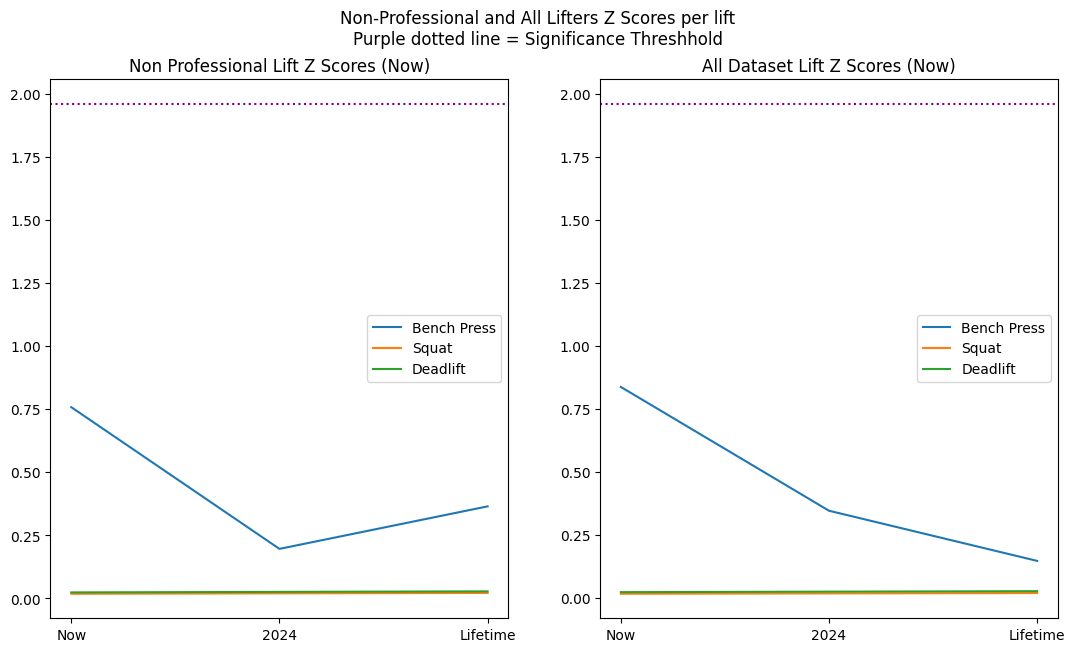

<Figure size 640x480 with 0 Axes>

In [47]:
# A line charts of Z scores
q5_x = ["Now","2024","Lifetime"]

q5_fig = plt.figure(figsize=(13,7))
q5_fig.suptitle("Non-Professional and All Lifters Z Scores per lift\nPurple dotted line = Significance Threshhold\n")

q5_bench_am = [bench_now_z, bench_2024_z, bench_lifetime_z]
q5_squat_am = [squat_now_z, squat_2024_z, squat_lifetime_z]
q5_deadlift_am = [deadlift_now_z, deadlift_2024_z, deadlift_lifetime_z]

q5_bench_am2 = [bench_now_z2, bench_2024_z2, bench_lifetime_z2]
q5_squat_am2 = [squat_now_z2, squat_2024_z2, squat_lifetime_z2]
q5_deadlift_am2 = [deadlift_now_z2, deadlift_2024_z2, deadlift_lifetime_z2]

# Non pro dataset
plt.subplot(1,2,1)
plt.title("Non Professional Lift Z Scores (Now)")
plt.plot(q5_x, q5_bench_am, label="Bench Press")
plt.plot(q5_x, q5_squat_am, label="Squat")
plt.plot(q5_x, q5_deadlift_am, label="Deadlift")
plt.axhline(z_threshhold, color="purple", linestyle="dotted")
plt.legend()

# All lifter dataset
plt.subplot(1,2,2)
plt.title("All Dataset Lift Z Scores (Now)")
plt.plot(q5_x, q5_bench_am2, label="Bench Press")
plt.plot(q5_x, q5_squat_am2, label="Squat")
plt.plot(q5_x, q5_deadlift_am2, label="Deadlift")
plt.axhline(z_threshhold, color="purple", linestyle="dotted")
plt.legend()

plt.show()
plt.clf()

### Question 6

Over time, does the distribution change?   
It does, but not in any direction. It rises and falls, but one observation I did make is that it looks like there is an increase over time of people competing in powerlifting which would explain the larger data ranges seen in recent years versus the small interquartile range and whiskers of the 80's and 90's.   

I confirmed this by plotting the number of lifts per year for the squat, bench press, and deadlift on a line chart, and indeed, there is a surge of competitiors after 2012 in the sport of powerlifting.   

2019 might possible be incomplete as there is a lessed number of competitors compared to 2018. I verified this to be the case as the last date in 2019 for a bench lift was 2019-03-16.   

<ipython-input-14-1e097676decd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bench_maxes.loc[:,"Year"] = bench_maxes["Date"].str[0:4]
<ipython-input-14-1e097676decd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squat_maxes.loc[:,"Year"] = squat_maxes["Date"].str[0:4]
<ipython-input-14-1e097676decd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

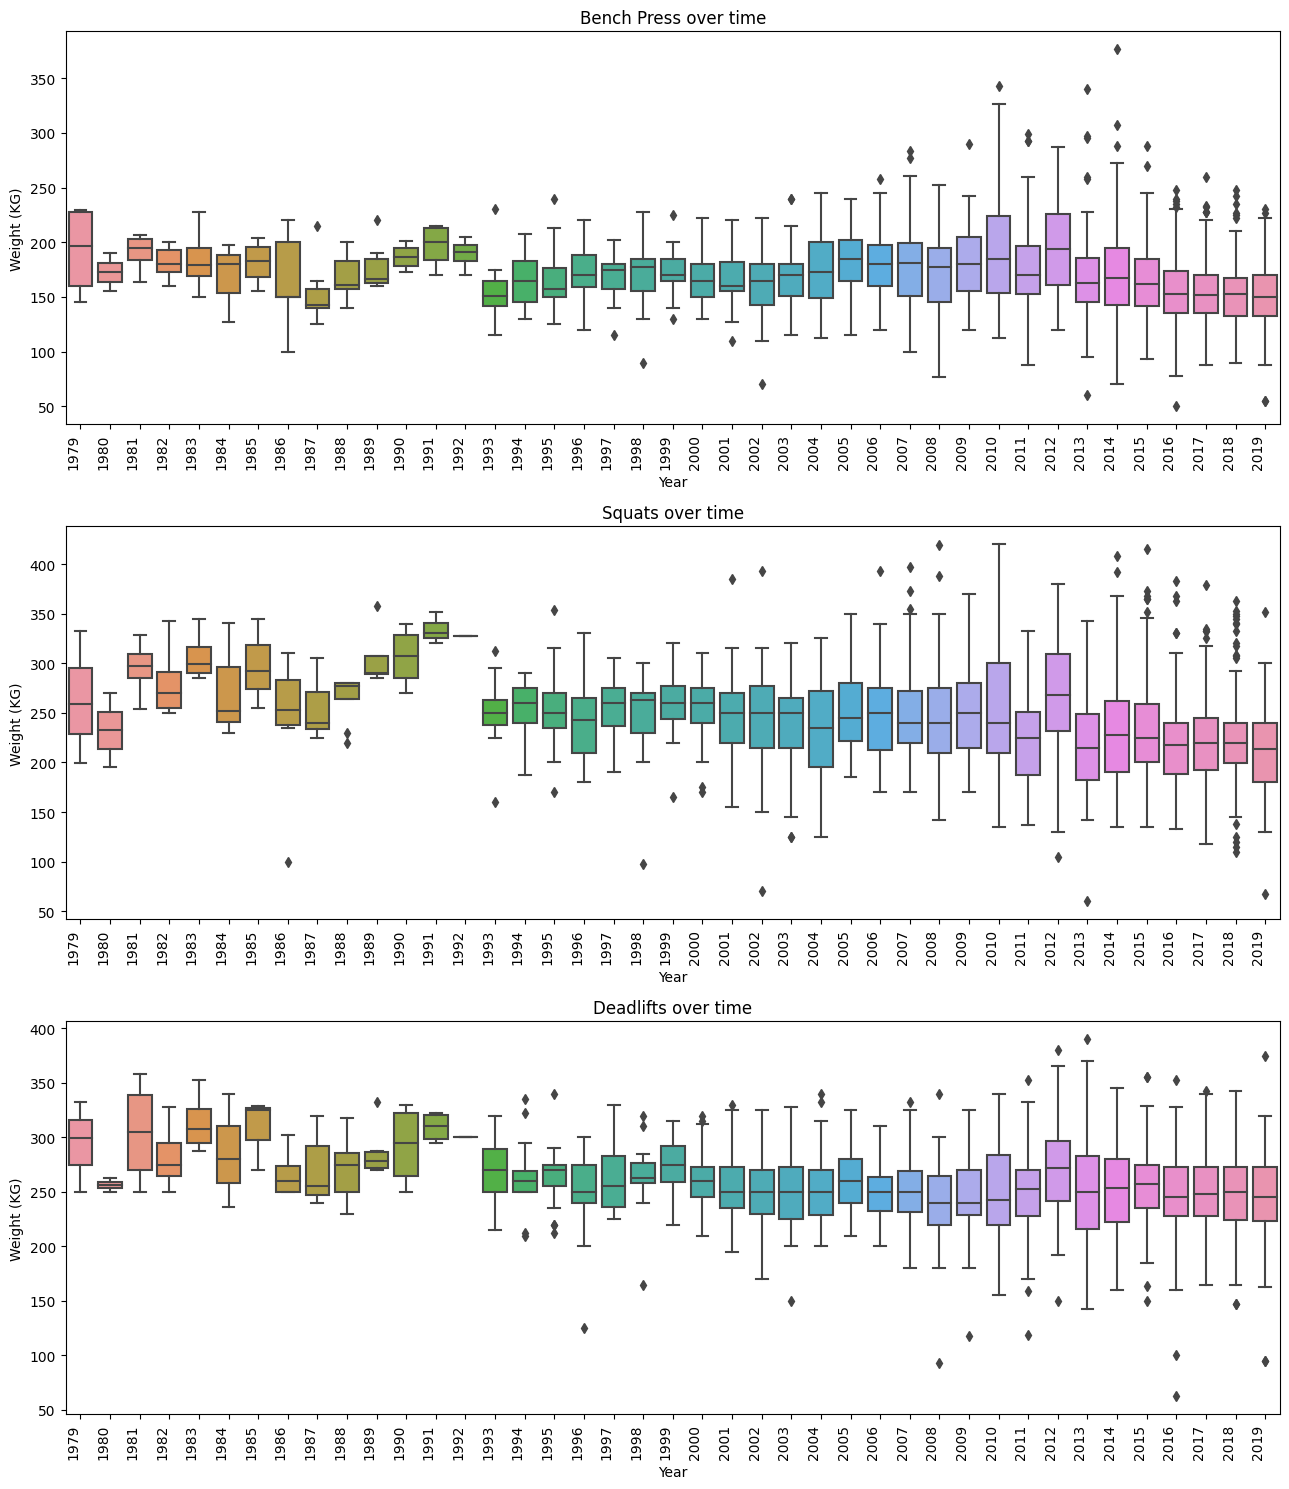

<Figure size 640x480 with 0 Axes>

In [ ]:
# Distribution over time

# Create a year column to aggregate by
bench_maxes.loc[:,"Year"] = bench_maxes["Date"].str[0:4]
bench_maxes_sorted = bench_maxes.sort_values(by="Year")

squat_maxes.loc[:,"Year"] = squat_maxes["Date"].str[0:4]
squat_maxes_sorted = squat_maxes.sort_values(by="Year")

deadlift_maxes.loc[:,"Year"] = deadlift_maxes["Date"].str[0:4]
deadlift_maxes_sorted = deadlift_maxes.sort_values(by="Year")

fig=plt.figure(figsize=(13,15))

# Bench Plot
plt.subplot(3,1,1)
sns.boxplot(x=bench_maxes_sorted.Year, y=bench_maxes_sorted.Best3BenchKg)
plt.xticks(rotation=90,ha="right")
plt.title("Bench Press over time")
plt.xlabel("Year")
plt.ylabel("Weight (KG)")

# Squat Plot
plt.subplot(3,1,2)
sns.boxplot(x=squat_maxes_sorted.Year, y=squat_maxes_sorted.Best3SquatKg)
plt.xticks(rotation=90,ha="right")
plt.title("Squats over time")
plt.xlabel("Year")
plt.ylabel("Weight (KG)")

# Deadlift Plot
plt.subplot(3,1,3)
sns.boxplot(x=deadlift_maxes_sorted.Year, y=deadlift_maxes_sorted.Best3DeadliftKg)
plt.xticks(rotation=90,ha="right")
plt.title("Deadlifts over time")
plt.xlabel("Year")
plt.ylabel("Weight (KG)")

plt.tight_layout()

plt.show()
plt.clf()


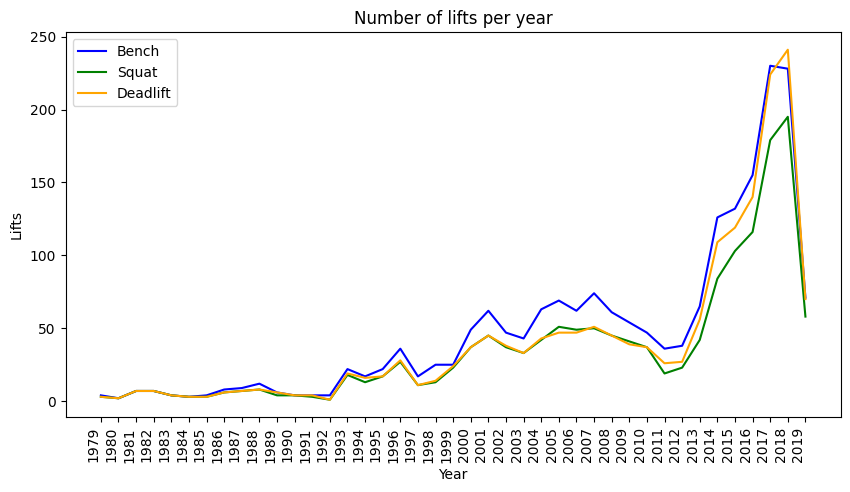

2019-03-16


<Figure size 640x480 with 0 Axes>

In [ ]:
# How many datapoint are there per year?
bench_counts = bench_maxes_sorted.groupby(["Year"]).Best3BenchKg.count().reset_index()
squat_counts = squat_maxes_sorted.groupby(["Year"]).Best3SquatKg.count().reset_index()
deadlift_counts = deadlift_maxes_sorted.groupby(["Year"]).Best3DeadliftKg.count().reset_index()

ax = plt.figure(figsize=(10,5))
plt.plot(bench_counts.Year, bench_counts.Best3BenchKg, color="blue")
plt.plot(squat_counts.Year,squat_counts.Best3SquatKg, color="green")
plt.plot(deadlift_counts.Year,deadlift_counts.Best3DeadliftKg, color="orange")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Year")
plt.ylabel("Lifts")
plt.title("Number of lifts per year")
plt.legend(["Bench","Squat","Deadlift"])

plt.show()
plt.clf()

# last date of dataset
bench_2019 = bench_maxes_sorted[(bench_maxes_sorted.Year == "2019")]
bench_2019.sort_values(by="Date")
print(bench_2019.Date.iloc[-1])

### Conclusion

It is apparent from the data and the distributions available that my end of year lifts as they are - 140KG bench press, 220KG squat, 230KG deadlift, are all on the low side for a competitive distirbution even factoring out prefessional level competitors.   

All three lifts at any of the three timeframes given (now, end of 2024, lifetime goals) are within 1 standard deviation of the mean for each distribution for the best bench press, squat and deadlift in my age group and weight class.   

When looking at the mean, median and mode of all three distributions, in all cases, my lifts exceed all three averages for the lifetime target, however, in all three lifts, my current max is under every average for all distributions.   

From looking at the percentile charts and statistics, it is clear that not only is my bench press anecdotally a lagging lift, but statistically, too. My bench press falls in the lower percentiles currently (0.2), whereas squat and deadlift are currently at 0.4 and 0.3 respectively. Over time, however, this changes to coming quite close to the percentile rankings for squat and deadlift when looking at the 2024 and lifetime rankings. When looking at the lifetime goal, all three lifts sit in the 0.7 percentile.   

Statistically, my lifts even now are somewhat likely to occur in the distributions (p=0.05), the lowest being my current bench press and deadlift at 22% and 27% respectively. At the end of 2024, the squat and deadlift are 53% and 46% respectively while bench press is slightly behind with 42%. When looking at the lifetime maxes, all three lifts have similar probability of occuring in the distribution, and all are over 60%.   

The bench press being behind was also verified when plotting the z scores of all three timeframes for all three lifts on a line chart. Regardless of the lower performance of the bench press, and all lifts being their lowest now, all lifts were at least half of the significance threshhold.   

Some considerations are that the distribution doesn't increase predictably over time. This may be in part due to the larger number of competitors in recent years compared to the smaller number of athlests and competitions of the 1980's and 90's. This may also introduce more variance as seen in the larger interquartile ranges of recent years post-2012.   

In conclusion, this analysis gives me the confidence to say that I would do OK, if not well in a competition at the end of 2024, and especially thereafter if I achieve my lifetime lifts and maybe even beyond. Therefore, at the end of 2024 should I reach these targets, I will seek my first proper powerlifting competition.   

A limitation of this analysis is that this presumes in the years to come I stay in the same weight class, which may change. If I were to do this analysis again, I would decide on a colour scheme ahead of time and I would spend more time looking into the dataset to understand it before making decisions on how to analyse it or what data types might be needed.   

From this analysis, I have learned how deeply you can understand a dataset you work with, the value in enjoying what you're working with and the utility in being genuinly curious to see where the analysis takes you.   




